In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from collections import defaultdict
from scipy.stats.stats import pearsonr

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
df = pd.read_csv('training.csv')

In [5]:
df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [6]:
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(), inplace = True)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(), inplace = True)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(), inplace = True)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(), inplace = True)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(), inplace = True)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(), inplace = True)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(), inplace = True)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(), inplace = True)

In [7]:
df['MMR_factor'] = ( df['MMRAcquisitionAuctionAveragePrice'] + df['MMRAcquisitonRetailCleanPrice'] + df['MMRCurrentAuctionCleanPrice'] + df['MMRCurrentRetailAveragePrice']) / 4

In [8]:
df_db = df[['VehOdo','MMR_factor','VehBCost','WarrantyCost','VehicleAge']]

In [9]:
X = StandardScaler().fit_transform(df_db.values)

In [10]:
dbscan = DBSCAN(eps = 0.97, min_samples = 10)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.97, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

In [11]:
dbscan.labels_[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [12]:
np.unique(dbscan.labels_,return_counts = True)

(array([-1,  0], dtype=int64), array([  152, 58234], dtype=int64))

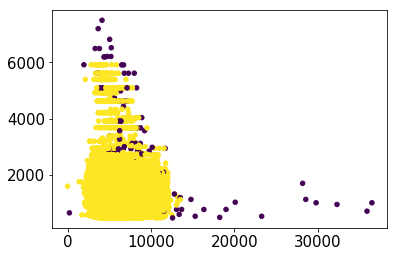

In [13]:
plt.scatter(df['VehBCost'], df['WarrantyCost'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [14]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_,sample_size = 5000))

Silhouette 0.5739507980102874


In [15]:
from scipy.spatial.distance import pdist, squareform


In [16]:
Y = X[:5000]

In [17]:
dist = pdist(Y, 'euclidean') 
print (dist)
dist = squareform(dist) 
print()
print(dist)

[3.21383964 1.38105399 2.7973365  ... 1.30417663 3.17076298 3.10514236]

[[0.         3.21383964 1.38105399 ... 2.40028359 2.59370378 4.38534542]
 [3.21383964 0.         4.26128574 ... 2.50785874 3.52495812 4.36014207]
 [1.38105399 4.26128574 0.         ... 2.96135894 2.7131448  4.60718357]
 ...
 [2.40028359 2.50785874 2.96135894 ... 0.         1.30417663 3.17076298]
 [2.59370378 3.52495812 2.7131448  ... 1.30417663 0.         3.10514236]
 [4.38534542 4.36014207 4.60718357 ... 3.17076298 3.10514236 0.        ]]


In [18]:
k = 20
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

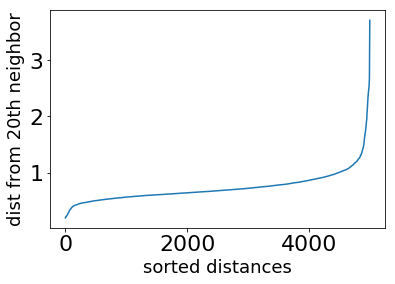

In [19]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()